# Ride Hailing Service: Exploratory Data Analysis
### Benjamen Simon

The goal of this document is to explore the given data before beginning modelling. I already have a suspicion that logistic regression to 'estimate the probability that a given price point will be accepted' would be the a good method. This exploration is aims to challenge or confirm that hypothesis, as well as identify any other features of the data.

### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [3]:
data = pd.read_csv('Data/driverAcceptanceData.csv', names = ['ID', 'PAY', 'ACCEPTED'], header = 0)

data.head()

,ID,PAY,ACCEPTED
0,0,29.358732,0
1,1,22.986847,0
2,2,18.020348,0
3,3,45.730717,1
4,4,14.642845,0


### Sort the data

In [7]:
# Change the acceptance to a factor
data['ACCEPTED'] = data['ACCEPTED'].astype('category')
data['ID'] = data['ID'].astype('category')

data_sorted_pay = data.sort_values(by=['PAY', 'ACCEPTED'], ascending=True)
display(data_sorted_pay.head())

data_sorted_acc = data.sort_values(by=['ACCEPTED', 'PAY'], ascending=True)
display(data_sorted_acc.head())

,ID,PAY,ACCEPTED
62,62,0.0,0
176,176,0.0,0
477,477,0.0,0
700,700,0.0,0
780,780,0.0,0


,ID,PAY,ACCEPTED
62,62,0.0,0
176,176,0.0,0
477,477,0.0,0
700,700,0.0,0
780,780,0.0,0


### Split the data

In [10]:
data_acceptances = data_sorted_pay[data_sorted_pay.ACCEPTED == 1]

data_rejections = data_sorted_pay[data_sorted_pay.ACCEPTED == 0]

### Summarise the data

In [14]:
data_summary = data_sorted_acc.describe(include =  'all')

display(data_summary)

print(f"The mean Pay was ${round(data_summary.iloc[4, 1], 2)}.")
print(f"The proportion of rides accepted was {data_summary.iloc[3, 2] * 100 / data_summary.iloc[0, 2]}%.")


,ID,PAY,ACCEPTED
count,1000.0,1000.000000,1000.0
unique,1000.0,NaN,2.0
top,0.0,NaN,1.0
freq,1.0,NaN,527.0
mean,NaN,25.713530,NaN
std,NaN,10.051410,NaN
min,NaN,0.000000,NaN
25%,NaN,18.878792,NaN
50%,NaN,25.483059,NaN
75%,NaN,32.825641,NaN


The average Pay was $25.71.
The proportion of rides accepted was 52.7%.


In [17]:
data_summary_acc = data_acceptances.describe(include =  'all')

display(data_summary_acc)

print(f"The minimum Pay was ${round(data_summary_acc.iloc[6, 1], 2)}.")
print(f"The maximum Pay was ${round(data_summary_acc.iloc[10, 1], 2)}.")
print(f"The mean Pay was ${round(data_summary_acc.iloc[4, 1], 2)}.")
print(f"The median Pay was ${round(data_summary_acc.iloc[8, 1], 2)}.")

,ID,PAY,ACCEPTED
count,527.0,527.000000,527.0
unique,527.0,NaN,1.0
top,340.0,NaN,1.0
freq,1.0,NaN,527.0
mean,NaN,32.076048,NaN
std,NaN,7.539845,NaN
min,NaN,5.403973,NaN
25%,NaN,26.767627,NaN
50%,NaN,31.686306,NaN
75%,NaN,36.810070,NaN


The minimum Pay was $5.4.
The maximum Pay was $53.67.
The mean Pay was $32.08.
The median Pay was $31.69.


In [18]:
data_summary_rej = data_rejections.describe(include =  'all')

display(data_summary_rej)

print(f"The minimum Pay was ${round(data_summary_rej.iloc[6, 1], 2)}.")
print(f"The maximum Pay was ${round(data_summary_rej.iloc[10, 1], 2)}.")
print(f"The mean Pay was ${round(data_summary_rej.iloc[4, 1], 2)}.")
print(f"The median Pay was ${round(data_summary_rej.iloc[8, 1], 2)}.")

,ID,PAY,ACCEPTED
count,473.0,473.000000,473.0
unique,473.0,NaN,1.0
top,0.0,NaN,0.0
freq,1.0,NaN,473.0
mean,NaN,18.624636,NaN
std,NaN,7.411038,NaN
min,NaN,0.000000,NaN
25%,NaN,13.712670,NaN
50%,NaN,19.044601,NaN
75%,NaN,23.397230,NaN


The minimum Pay was $0.0.
The maximum Pay was $43.15.
The mean Pay was $18.62.
The median Pay was $19.04.


### Exploratory Plots

### Scatter Plots

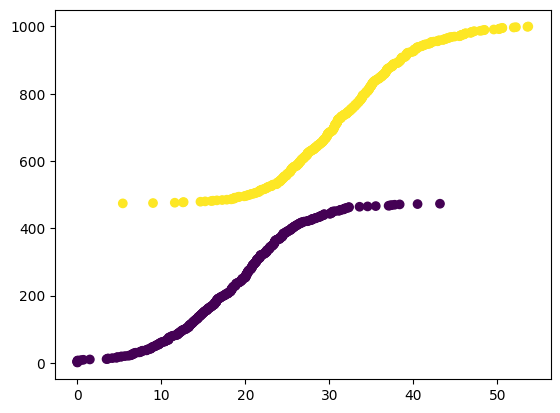

In [109]:
plt.scatter(
    x=data_sorted_acc.iloc[:,1],
    y=range(1, 1001),
    c=data_sorted_acc.iloc[:,2],
)

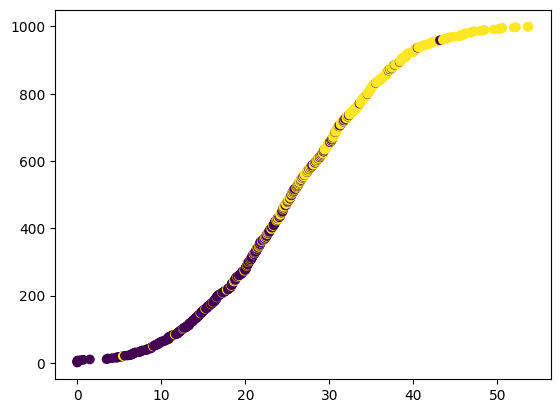

In [110]:
plt.scatter(
    x=data_sorted_pay.iloc[:,1],
    y=range(1, 1001),
    c=data_sorted_pay.iloc[:,2],
)

### Histograms

array([[<AxesSubplot: title={'center': 'PAY'}>]], dtype=object)

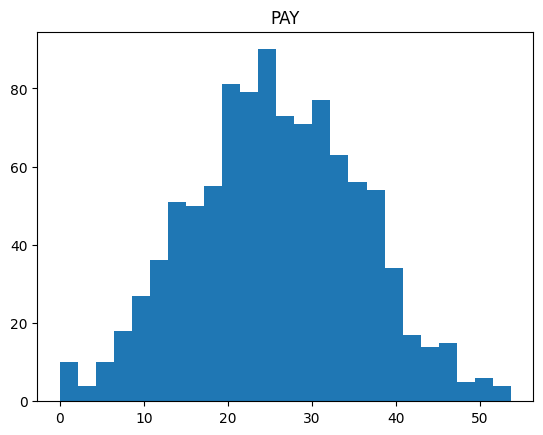

In [113]:
data_sorted_acc.hist(column='PAY', bins=25, grid=False)